In [71]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')

In [111]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [73]:
x = df.drop('label',axis=1)

In [74]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [75]:
y = df['label']

In [76]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [77]:
df.shape

(20800, 5)

# Count Vectorizer


In [78]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [79]:
df = df.dropna()

In [80]:
#making copy of dataframe in messages
messages = df.copy()

In [81]:
#will reset indexes becoz we dropped nan values and those indices needs to be replaced 
messages.reset_index(inplace=True)

In [82]:
messages.head(10)
#indices are now in order after resetting

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [83]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [84]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
  review = re.sub('[^a-zA-z]',' ',messages['title'][i])
  review = review.lower()
  review = review.split()
  
  #the words which are not in stopwards gonna get stemmed in porter stemmer
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')] 
  review = ' '.join(review)
  corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
corpus[2]

'truth might get fire'

In [86]:
# Applying CountVectorizer
# creating bag of words model extracting the most frequently used 5000 words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()

In [87]:
x.shape

(18285, 5000)

In [88]:
y = messages['label']

In [89]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [90]:
## Doing the train test split 
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size = 0.33,random_state=0)

In [91]:
cv.get_feature_names()[:30]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag',
 'acquit']

In [92]:
#algo which was used in the model
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [93]:
#checking how x_train looks like in dataframe
count_df = pd.DataFrame(X_train,columns=cv.get_feature_names())

In [94]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,achiev,acknowledg,acknowledg emf,acknowledg emf damag,acquit,acquitt,across,act,act like,act new,act new york,action,activ,activist,actor,...,xi,xi jinp,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,yemen,yet,yet anoth,yiannopoulo,yield,york,york citi,york new,york new york,york time,yorker,young,young peopl,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Multinomial Naive Bayes

In [96]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [97]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


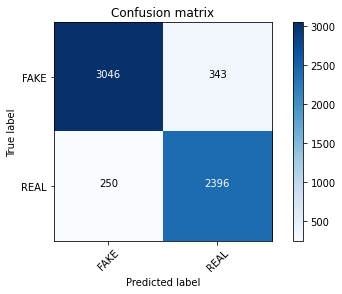

In [98]:
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3389
           1       0.87      0.91      0.89      2646

    accuracy                           0.90      6035
   macro avg       0.90      0.90      0.90      6035
weighted avg       0.90      0.90      0.90      6035



# MNB with Hyperparameter(alpha)

In [99]:
classifier = MultinomialNB(alpha=0.1)

In [100]:
# iterating for different values of alpha from 0.1-1
previous_score = 0
for alpha in np.arange(0,1,0.1):
  sub_classifier = MultinomialNB(alpha=alpha)
  sub_classifier.fit(X_train,y_train)
  y_pred = sub_classifier.predict(X_test)
  score = metrics.accuracy_score(y_test,y_pred)
  if score>previous_score:
        classifier=sub_classifier
  print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8906379453189727
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9022369511184756
Alpha: 0.30000000000000004, Score : 0.9019055509527755
Alpha: 0.4, Score : 0.9012427506213753
Alpha: 0.5, Score : 0.9010770505385253
Alpha: 0.6000000000000001, Score : 0.9017398508699255
Alpha: 0.7000000000000001, Score : 0.9022369511184756
Alpha: 0.8, Score : 0.9009113504556753
Alpha: 0.9, Score : 0.9014084507042254


In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3389
           1       0.87      0.90      0.89      2646

    accuracy                           0.90      6035
   macro avg       0.90      0.90      0.90      6035
weighted avg       0.90      0.90      0.90      6035



In [101]:
#feature names
feature_names = cv.get_feature_names()

In [102]:
#select the coefficient value the most -ve value will depict the most fakest word
classifier.coef_[0]

array([ -9.09965961,  -8.62203205,  -9.09965961, ..., -10.79425533,
        -8.91394246,  -9.32791826])

In [103]:
# sorting according to the first 20 most real words
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[:20]

[(-3.9994199281874554, 'trump'),
 (-4.287143466026011, 'hillari'),
 (-4.395660392643989, 'clinton'),
 (-4.899240497791205, 'elect'),
 (-5.175869372480226, 'new'),
 (-5.234001137931237, 'comment'),
 (-5.273238952556101, 'video'),
 (-5.3860875397004815, 'war'),
 (-5.396092625661444, 'us'),
 (-5.411290486570875, 'hillari clinton'),
 (-5.416408205007856, 'fbi'),
 (-5.47995525612455, 'vote'),
 (-5.565526247437875, 'email'),
 (-5.577509614324971, 'world'),
 (-5.633286151782383, 'obama'),
 (-5.733772227355374, 'donald'),
 (-5.762366026722114, 'donald trump'),
 (-5.784361048307661, 'russia'),
 (-5.845495436801029, 'day'),
 (-5.861381394389839, 'america')]

In [104]:
# most fake words
sorted(zip(classifier.coef_[0],feature_names))[:20]

[(-10.794255327179197, 'abe'),
 (-10.794255327179197, 'abroad'),
 (-10.794255327179197, 'abus new'),
 (-10.794255327179197, 'abus new york'),
 (-10.794255327179197, 'act new'),
 (-10.794255327179197, 'act new york'),
 (-10.794255327179197, 'advic'),
 (-10.794255327179197, 'advis new'),
 (-10.794255327179197, 'advis new york'),
 (-10.794255327179197, 'afford care'),
 (-10.794255327179197, 'afford care act'),
 (-10.794255327179197, 'age new'),
 (-10.794255327179197, 'age new york'),
 (-10.794255327179197, 'agenda breitbart'),
 (-10.794255327179197, 'ail'),
 (-10.794255327179197, 'aleppo new'),
 (-10.794255327179197, 'aleppo new york'),
 (-10.794255327179197, 'ali'),
 (-10.794255327179197, 'america breitbart'),
 (-10.794255327179197, 'america new york')]

In [105]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = cv.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    if prediction==0:
      print('FAKE')
    else:
      print('REAL')
    

In [106]:
fake_news_det('Samantha Bee Explores the Dangerous Rise of the Alt Right in American Politics (Video)')

REAL
